# EDA - Prediction of Sepsis from Clinical Data.

## Group- 3

### Group members present (Name, ID):

•	  Rakeshwar Rao Baggu(0775058)

•	  Riddhi Deshpande(0775846)

•	  Sarabjeet Singh Virk(0775231)

#### **Note** :  Please check the instructions.txt file mentioned in the project folder for steps on how to run the python code cells as well as for visualisation.

####  What is Sepsis?

Sepsis is a life-threatening condition that occurs when the body's response to infection causes tissue damage, organ failure, or death

## Data Set Description


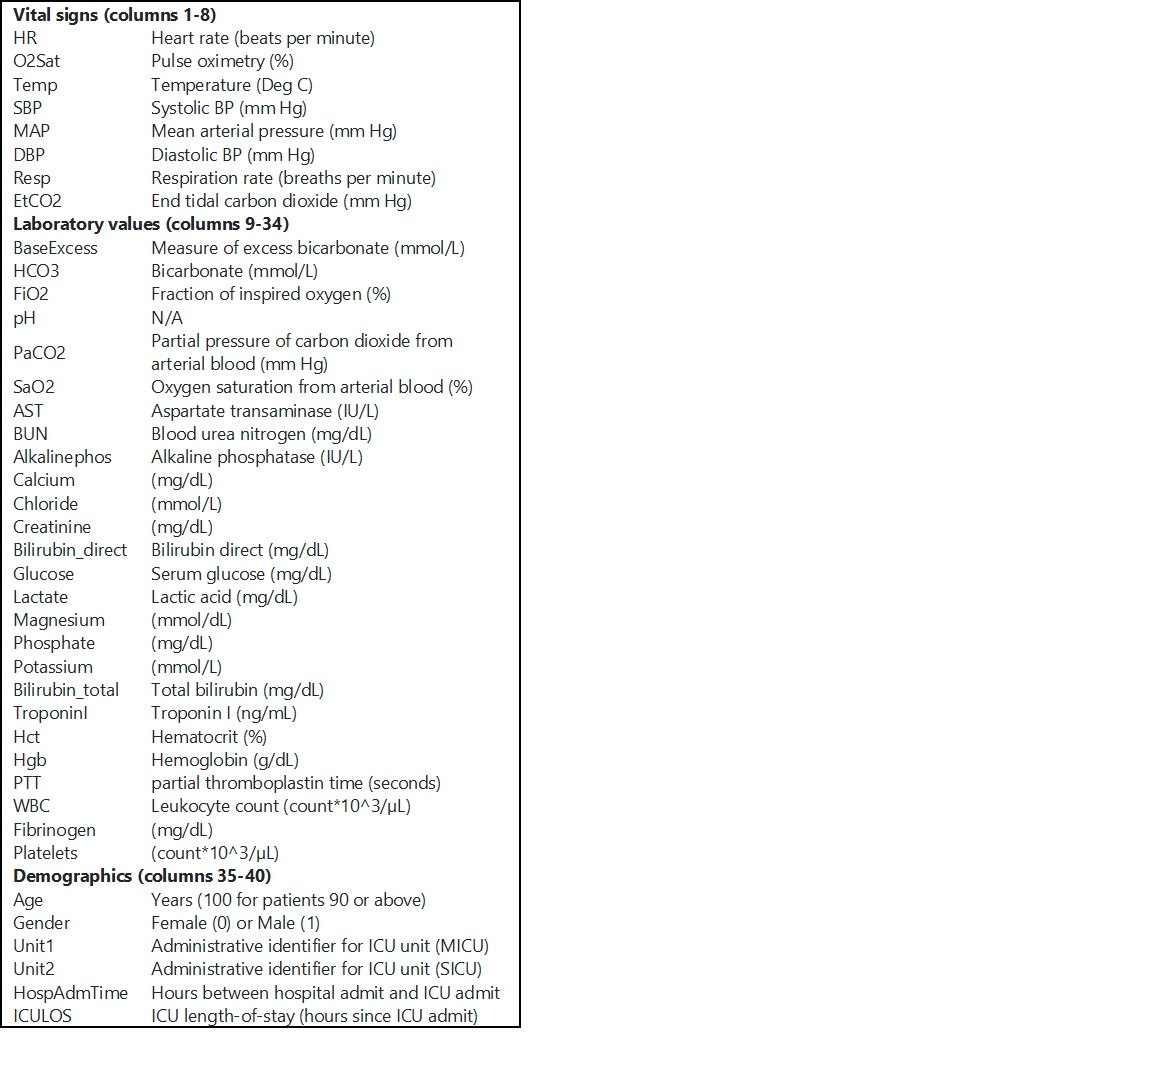


In [1]:
# Importing the packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading in the dataset

df=pd.read_csv("train_patient.csv")

In [4]:
#View the head of the dataframe.

df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,88.52,1,NaN,NaN,-697.71,1,0,0,0
1,73.0,100.0,36.17,NaN,85.0,NaN,31.0,NaN,7.0,NaN,...,NaN,88.52,1,NaN,NaN,-697.71,2,0,0,1
2,88.0,99.0,NaN,NaN,87.0,NaN,31.0,NaN,NaN,NaN,...,NaN,88.52,1,NaN,NaN,-697.71,3,0,0,2
3,90.0,99.0,NaN,NaN,90.0,NaN,25.0,NaN,NaN,NaN,...,NaN,88.52,1,NaN,NaN,-697.71,4,0,0,3
4,93.0,98.0,NaN,NaN,96.0,NaN,28.0,NaN,NaN,NaN,...,NaN,88.52,1,NaN,NaN,-697.71,5,0,0,4


In [5]:
#View the tail of the dataframe.

df.tail()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
1172233,74.5,100.0,37.1,125.0,86.0,70.0,NaN,NaN,NaN,NaN,...,NaN,28.0,1,0.0,1.0,-194.62,15,0,30335,14
1172234,74.0,99.0,37.1,121.0,80.0,65.0,21.0,NaN,NaN,NaN,...,NaN,28.0,1,0.0,1.0,-194.62,16,0,30335,15
1172235,NaN,100.0,37.0,130.0,NaN,77.0,15.0,NaN,NaN,NaN,...,NaN,28.0,1,0.0,1.0,-194.62,17,0,30335,16
1172236,70.0,100.0,NaN,129.0,90.0,76.0,20.0,NaN,NaN,NaN,...,NaN,28.0,1,0.0,1.0,-194.62,18,0,30335,17
1172237,68.0,100.0,36.7,126.5,91.0,76.0,17.5,NaN,NaN,NaN,...,NaN,28.0,1,0.0,1.0,-194.62,19,0,30335,18


In [6]:
#View the shape of the dataframe.

df.shape

(1172238, 43)

In [7]:
#View the info of the dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172238 entries, 0 to 1172237
Data columns (total 43 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   HR                1064662 non-null  float64
 1   O2Sat             1023033 non-null  float64
 2   Temp              396981 non-null   float64
 3   SBP               998729 non-null   float64
 4   MAP               1034882 non-null  float64
 5   DBP               738524 non-null   float64
 6   Resp              1014002 non-null  float64
 7   EtCO2             29955 non-null    float64
 8   BaseExcess        83328 non-null    float64
 9   HCO3              64367 non-null    float64
 10  FiO2              120778 non-null   float64
 11  pH                99153 non-null    float64
 12  PaCO2             77847 non-null    float64
 13  SaO2              46423 non-null    float64
 14  AST               18421 non-null    float64
 15  BUN               85614 non-null    float64
 16  

In [8]:
# Verifying for any null values.

df.isnull().sum()

HR                   107576
O2Sat                149205
Temp                 775257
SBP                  173509
MAP                  137356
DBP                  433714
Resp                 158236
EtCO2               1142283
BaseExcess          1088910
HCO3                1107871
FiO2                1051460
pH                  1073085
PaCO2               1094391
SaO2                1125815
AST                 1153817
BUN                 1086624
Alkalinephos        1154089
Calcium             1106865
Chloride            1104086
Creatinine          1098595
Bilirubin_direct    1170189
Glucose              990748
Lactate             1137918
Magnesium           1092520
Phosphate           1121282
Potassium           1056927
Bilirubin_total     1155909
TroponinI           1164580
Hct                 1057014
Hgb                 1080051
PTT                 1130287
WBC                 1092907
Fibrinogen          1164090
Platelets           1100438
Age                       0
Gender              

In [9]:
# Calculating the mean for the columns with null values.

mean1 = df['HR'].mean()
mean2 = df['O2Sat'].mean()
mean3 = df['Temp'].mean()
mean4 = df['SBP'].mean()
mean5 = df['MAP'].mean()
mean6 = df['DBP'].mean()
mean7 = df['Resp'].mean()
mean8 = df['EtCO2'].mean()
mean9 = df['BaseExcess'].mean()
mean10 = df['HCO3'].mean()
mean11 = df['FiO2'].mean()
mean12 = df['pH'].mean()
mean13 = df['PaCO2'].mean()
mean14 = df['SaO2'].mean()
mean15 = df['AST'].mean()
mean16 = df['BUN'].mean()
mean17 = df['Alkalinephos'].mean()
mean18 = df['Calcium'].mean()
mean19 = df['Chloride'].mean()
mean20 = df['Creatinine'].mean()
mean21 = df['Bilirubin_direct'].mean()
mean22 = df['Glucose'].mean()
mean23 = df['Lactate'].mean()
mean24 = df['Magnesium'].mean()
mean25 = df['Phosphate'].mean()
mean26 = df['Potassium'].mean()
mean27 = df['Bilirubin_total'].mean()
mean28 = df['TroponinI'].mean()
mean29 = df['Hct'].mean()
mean30 = df['Hgb'].mean()
mean31 = df['PTT'].mean()
mean32 = df['WBC'].mean()
mean33 = df['Fibrinogen'].mean()
mean34 = df['Platelets'].mean()
mean35 = df['Age'].mean()
mean36 = df['Gender'].mean()
mean37 = df['Unit1'].mean()
mean38 = df['Unit2'].mean()
mean40 = df['HospAdmTime'].mean()

In [10]:
# Replacing the null values with the mean values for the columns.

df['HR'].replace(np.nan, mean1, inplace = True)
df['O2Sat'].replace(np.nan, mean2, inplace = True)
df['Temp'].replace(np.nan, mean3, inplace = True)
df['SBP'].replace(np.nan, mean4, inplace = True)
df['MAP'].replace(np.nan, mean5, inplace = True)
df['DBP'].replace(np.nan, mean6, inplace = True)
df['Resp'].replace(np.nan, mean7, inplace = True)
df['EtCO2'].replace(np.nan, mean8, inplace = True)
df['BaseExcess'].replace(np.nan, mean9, inplace = True)
df['HCO3'].replace(np.nan, mean10, inplace = True)
df['FiO2'].replace(np.nan, mean11, inplace = True)
df['pH'].replace(np.nan, mean12, inplace = True)
df['PaCO2'].replace(np.nan, mean13, inplace = True)
df['SaO2'].replace(np.nan, mean14, inplace = True)
df['AST'].replace(np.nan, mean15, inplace = True)
df['BUN'].replace(np.nan, mean16, inplace = True)
df['Alkalinephos'].replace(np.nan, mean17, inplace = True)
df['Calcium'].replace(np.nan, mean18, inplace = True)
df['Chloride'].replace(np.nan, mean19, inplace = True)
df['Creatinine'].replace(np.nan, mean20, inplace = True)
df['Bilirubin_direct'].replace(np.nan, mean21, inplace = True)
df['Glucose'].replace(np.nan, mean22, inplace = True)
df['Lactate'].replace(np.nan, mean23, inplace = True)
df['Magnesium'].replace(np.nan, mean24, inplace = True)
df['Phosphate'].replace(np.nan, mean25, inplace = True)
df['Potassium'].replace(np.nan, mean26, inplace = True)
df['Bilirubin_total'].replace(np.nan, mean27, inplace = True)
df['TroponinI'].replace(np.nan, mean28, inplace = True)
df['Hct'].replace(np.nan, mean29, inplace = True)
df['Hgb'].replace(np.nan, mean30, inplace = True)
df['PTT'].replace(np.nan, mean31, inplace = True)
df['WBC'].replace(np.nan, mean32, inplace = True)
df['Fibrinogen'].replace(np.nan, mean33, inplace = True)
df['Platelets'].replace(np.nan, mean34, inplace = True)
df['Age'].replace(np.nan, mean35, inplace = True)
df['Gender'].replace(np.nan, mean36, inplace = True)
df['Unit1'].replace(np.nan, mean37, inplace = True)
df['Unit2'].replace(np.nan, mean38, inplace = True)
df['HospAdmTime'].replace(np.nan, mean40, inplace = True)


In [11]:
# calculating the mean,std and min values from the dataframe.

df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
HR,1172238.0,84.738287,16.433821,20.00,74.000000,84.738287,94.000000,280.00
O2Sat,1172238.0,97.220613,2.730663,20.00,96.000000,97.220613,99.000000,100.00
Temp,1172238.0,36.995514,0.451764,20.90,36.995514,36.995514,36.995514,50.00
SBP,1172238.0,122.782614,20.909659,20.00,109.000000,122.782614,134.000000,299.00
MAP,1172238.0,81.111004,15.009325,20.00,71.000000,81.111004,88.500000,300.00
DBP,1172238.0,62.725780,10.858538,20.00,58.000000,62.725780,64.000000,300.00
Resp,1172238.0,18.742635,4.846698,1.00,16.000000,18.742635,21.000000,100.00
EtCO2,1172238.0,33.046486,1.244198,10.00,33.046486,33.046486,33.046486,100.00
BaseExcess,1172238.0,-0.669328,1.143782,-32.00,-0.669328,-0.669328,-0.669328,100.00
HCO3,1172238.0,24.083649,1.027855,0.00,24.083649,24.083649,24.083649,55.00


In [12]:
# Relacing the Gender column values from binary to Categorical.('0' = Female and '1' = Female


df['Gender'].replace(0, 'Female',inplace=True)
df['Gender'].replace(1, 'Male',inplace=True)

In [13]:
df.head(100)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
0,84.738287,97.220613,36.995514,122.782614,81.111004,62.72578,18.742635,33.046486,-0.669328,24.083649,...,197.139216,88.52,Male,0.501667,0.498333,-697.71,1,0,0,0
1,73.000000,100.000000,36.170000,122.782614,85.000000,62.72578,31.000000,33.046486,7.000000,24.083649,...,197.139216,88.52,Male,0.501667,0.498333,-697.71,2,0,0,1
2,88.000000,99.000000,36.995514,122.782614,87.000000,62.72578,31.000000,33.046486,-0.669328,24.083649,...,197.139216,88.52,Male,0.501667,0.498333,-697.71,3,0,0,2
3,90.000000,99.000000,36.995514,122.782614,90.000000,62.72578,25.000000,33.046486,-0.669328,24.083649,...,197.139216,88.52,Male,0.501667,0.498333,-697.71,4,0,0,3
4,93.000000,98.000000,36.995514,122.782614,96.000000,62.72578,28.000000,33.046486,-0.669328,24.083649,...,197.139216,88.52,Male,0.501667,0.498333,-697.71,5,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,80.000000,99.000000,35.720000,146.000000,89.330000,62.72578,14.000000,33.046486,-0.669328,24.083649,...,197.139216,66.10,Female,0.501667,0.498333,-188.45,29,0,2,28
96,82.000000,98.000000,36.440000,144.000000,86.670000,62.72578,14.000000,33.046486,-0.669328,24.083649,...,197.139216,66.10,Female,0.501667,0.498333,-188.45,30,0,2,29
97,85.500000,100.000000,36.995514,146.000000,89.000000,62.72578,11.500000,33.046486,-0.669328,24.083649,...,197.139216,66.10,Female,0.501667,0.498333,-188.45,31,0,2,30
98,83.000000,98.000000,36.995514,146.000000,88.000000,62.72578,14.000000,33.046486,-0.669328,24.083649,...,197.139216,66.10,Female,0.501667,0.498333,-188.45,32,0,2,31


In [14]:
# Verifying the dataframe again to view if the dataframe has any null values.


df.isnull().sum()

HR                  0
O2Sat               0
Temp                0
SBP                 0
MAP                 0
DBP                 0
Resp                0
EtCO2               0
BaseExcess          0
HCO3                0
FiO2                0
pH                  0
PaCO2               0
SaO2                0
AST                 0
BUN                 0
Alkalinephos        0
Calcium             0
Chloride            0
Creatinine          0
Bilirubin_direct    0
Glucose             0
Lactate             0
Magnesium           0
Phosphate           0
Potassium           0
Bilirubin_total     0
TroponinI           0
Hct                 0
Hgb                 0
PTT                 0
WBC                 0
Fibrinogen          0
Platelets           0
Age                 0
Gender              0
Unit1               0
Unit2               0
HospAdmTime         0
ICULOS              0
SepsisLabel         0
Patient_id          0
time                0
dtype: int64

In [15]:
# Checking the coorelation for the columns.

df.corr()



,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_id,time
HR,1.000000,-0.075977,0.151343,-0.031522,0.081378,0.117442,0.224038,0.004528,-0.022842,-0.021998,...,0.006403,0.006116,-0.159019,0.013166,-0.013166,-0.056943,0.039698,0.044725,-0.018646,0.039002
O2Sat,-0.075977,1.000000,-0.018107,0.028119,0.030510,0.004010,-0.145946,-0.002884,0.010338,-0.014140,...,-0.006396,-0.006138,-0.045394,-0.035323,0.035323,-0.005701,-0.043057,-0.007246,-0.014122,-0.044540
Temp,0.151343,-0.018107,1.000000,0.000257,-0.029711,-0.053479,0.077327,0.036620,0.036302,0.014909,...,0.020852,0.005614,-0.045813,-0.095746,0.095746,0.007516,0.052487,0.027135,-0.026544,0.050502
SBP,-0.031522,0.028119,0.000257,1.000000,0.754663,0.472094,0.044533,0.011729,0.035666,0.012569,...,0.002444,0.005372,0.009578,0.066020,-0.066020,0.030674,0.060418,-0.009529,0.087887,0.063408
MAP,0.081378,0.030510,-0.029711,0.754663,1.000000,0.713896,0.045379,0.010960,0.026778,0.005148,...,0.002621,0.007662,-0.152029,0.107609,-0.107609,0.030290,0.035076,-0.014129,0.166234,0.039793
DBP,0.117442,0.004010,-0.053479,0.472094,0.713896,1.000000,0.047827,0.011520,0.020551,0.006202,...,0.001277,0.013898,-0.225040,0.162327,-0.162327,0.026380,0.015691,-0.010866,0.154411,0.021712
Resp,0.224038,-0.145946,0.077327,0.044533,0.045379,0.047827,1.000000,-0.025135,-0.009894,-0.010066,...,0.008961,0.015920,0.028567,0.059901,-0.059901,-0.030811,0.095863,0.046476,-0.008380,0.096910
EtCO2,0.004528,-0.002884,0.036620,0.011729,0.010960,0.011520,-0.025135,1.000000,-0.000149,0.000115,...,0.007905,0.009119,-0.026881,-0.001491,0.001491,0.004151,0.026974,-0.001499,-0.003542,0.027363
BaseExcess,-0.022842,0.010338,0.036302,0.035666,0.026778,0.020551,-0.009894,-0.000149,1.000000,0.244723,...,0.018136,0.013613,-0.010706,0.013980,-0.013980,-0.006363,0.040226,0.006237,-0.000766,0.040738
HCO3,-0.021998,-0.014140,0.014909,0.012569,0.005148,0.006202,-0.010066,0.000115,0.244723,1.000000,...,0.015191,0.062199,0.004893,-0.008581,0.008581,-0.005178,0.026792,-0.003667,-0.001962,0.026918


In [16]:
df.to_csv('C:\\Users\\Rakesh\\Downloads\\train_patient_out.csv')

<Figure size 1152x432 with 0 Axes>

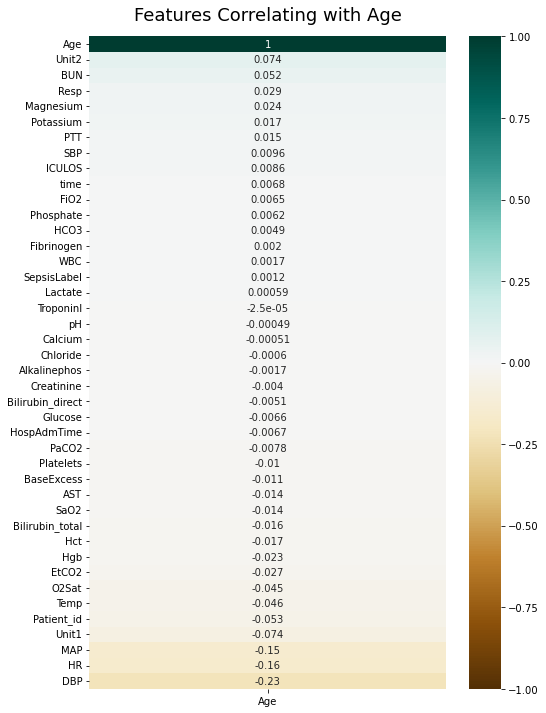

In [16]:
plt.figure(figsize=(16, 6))

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Age']].sort_values(by='Age', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Age', fontdict={'fontsize':18}, pad=16);

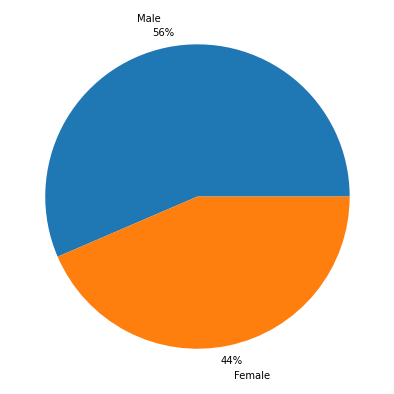

In [104]:
# Visualising the Gender distribution.
plt.figure(figsize=(7,7))
Gen1 = df["Gender"].value_counts()

axs[0].pie(Gen1, labels=Gen1.index, autopct='%1.1f%%', shadow=None)
axs[0].axis('equal')
axs[0].set_title('Gender Distribution')

plt.pie(Gen1, labels=Gen1.index, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.show()


<AxesSubplot:xlabel='Age', ylabel='Density'>

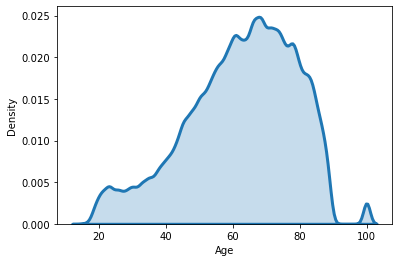

In [83]:
sns.distplot(df['Age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'Gender')

##### From the above, we can see that there are few columns with postive and negative relatioship values. This provides useful info for us to proceed further to build the model and derive key insights.

## Vital Signs:

##  ***HR*** - Heart rate (beats per minute)

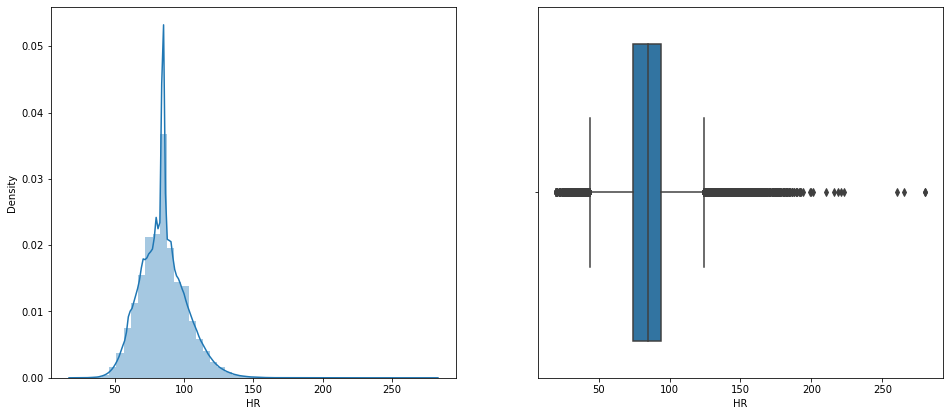

In [17]:
plt.figure(figsize=(16,15))


plt.subplot(2,2,1)
sns.distplot(df['HR'])

plt.subplot(2,2,2)
sns.boxplot(df['HR'])

plt.show()

One of the key vital signs - ***Heart Rate/Min*** : Heart rate > 90 beats/min is a symptom of breathless associated in a patient with Sepis infection.

#### Fibrinogen and Creatinine

<AxesSubplot:xlabel='Fibrinogen', ylabel='Creatinine'>

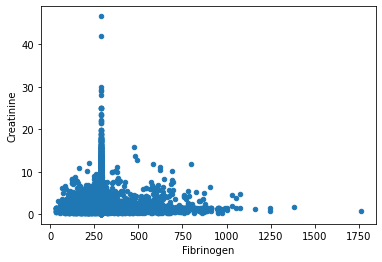

In [18]:

df.plot.scatter('Fibrinogen', 'Creatinine')

As per the research, Inceased levels of Fibrinogen and lowest level of Creatinine levels are associated with Sepsis.

## Demographics

### Age - Years

Text(0.5, 1.0, 'Age Distribution')

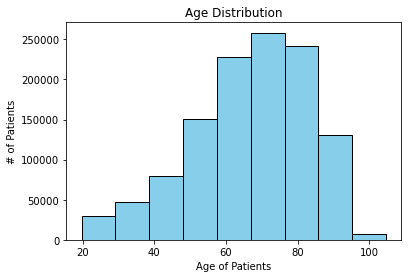

In [21]:
plt.hist(df['Age'], bins=9, align='right', color='skyblue', edgecolor='black')
plt.xlabel('Age of Patients')
plt.ylabel('# of Patients')
plt.title('Age Distribution')

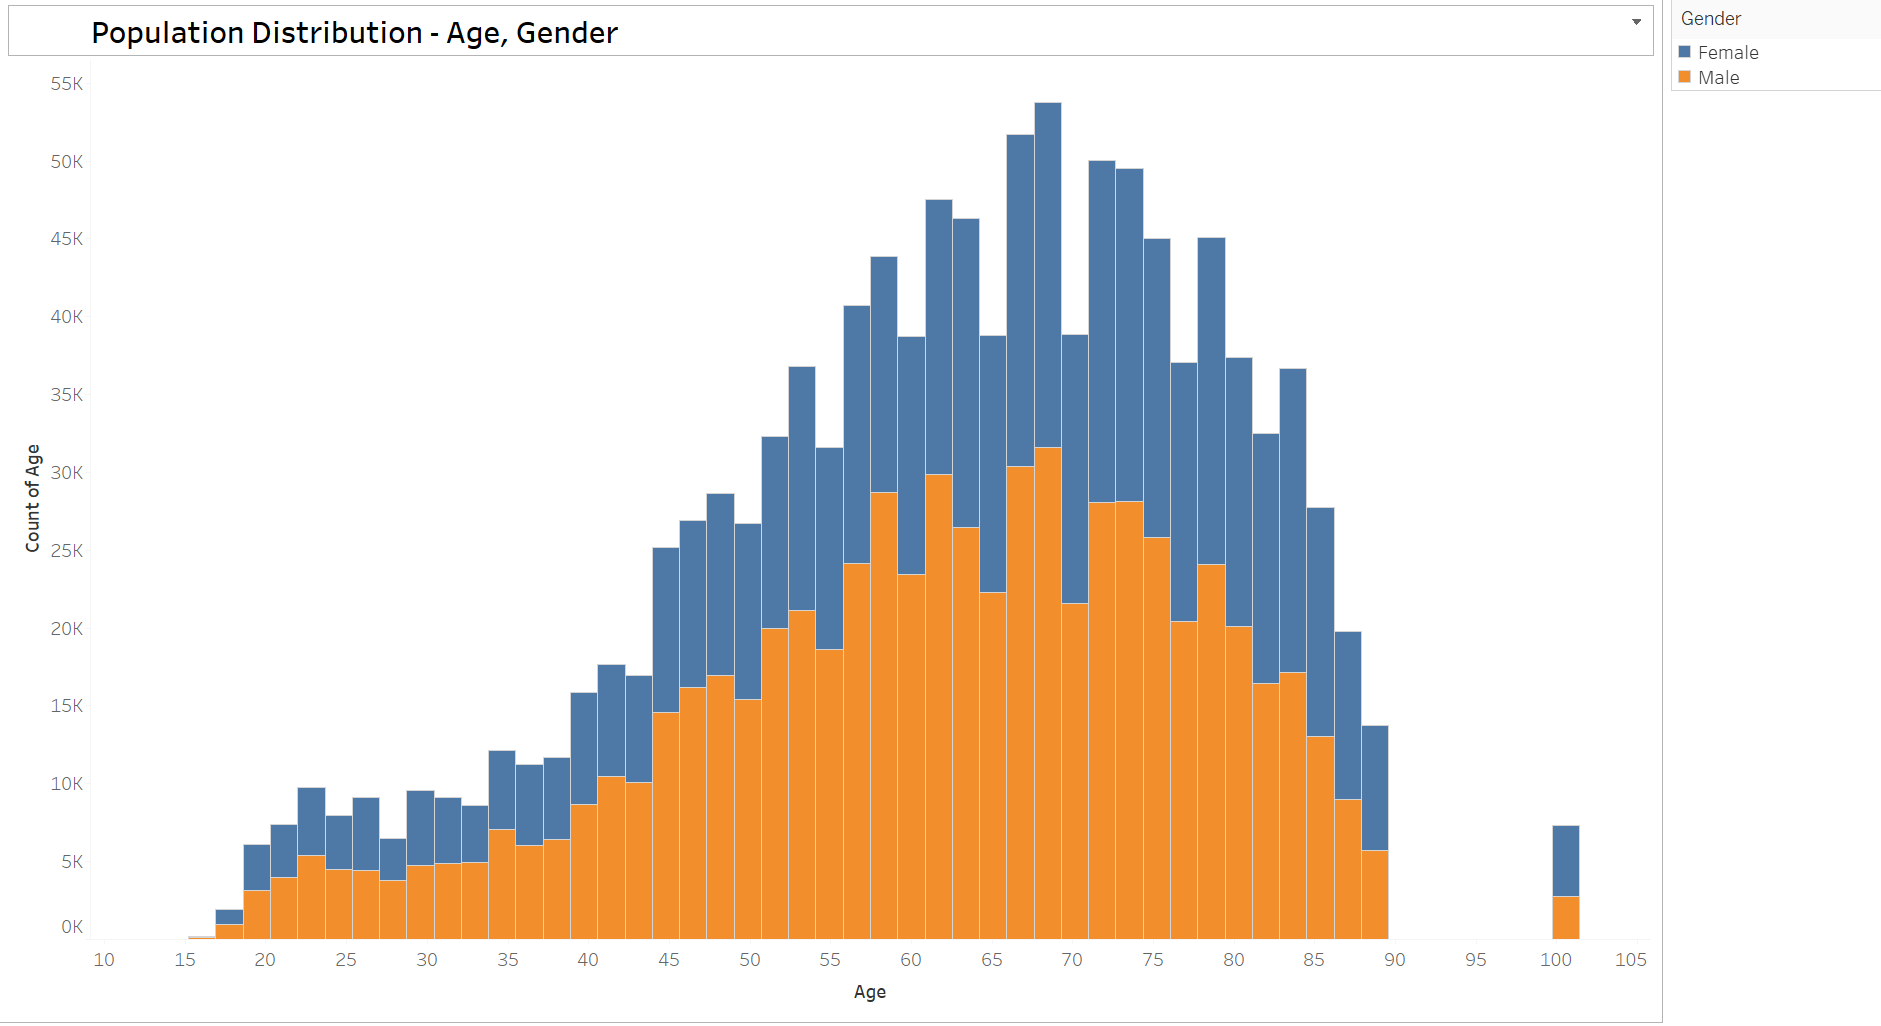

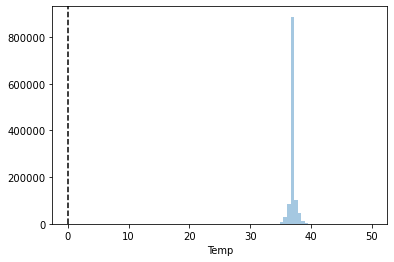

In [22]:
sns.distplot(df['Temp'], kde=False);
plt.axvline(0, color="k", linestyle="--");

#### Resp

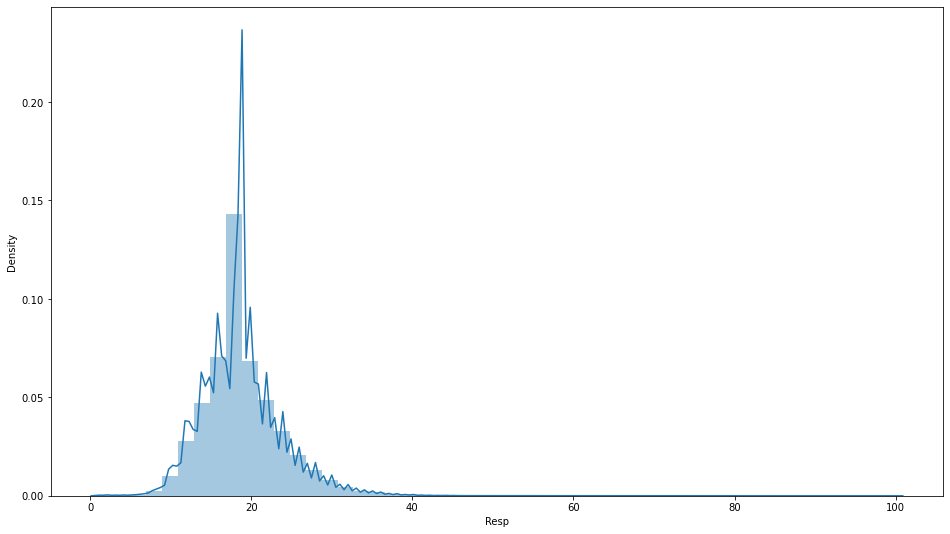

In [23]:

plt.figure(figsize=(16,9))

sns.distplot(df['Resp'])

plt.show()

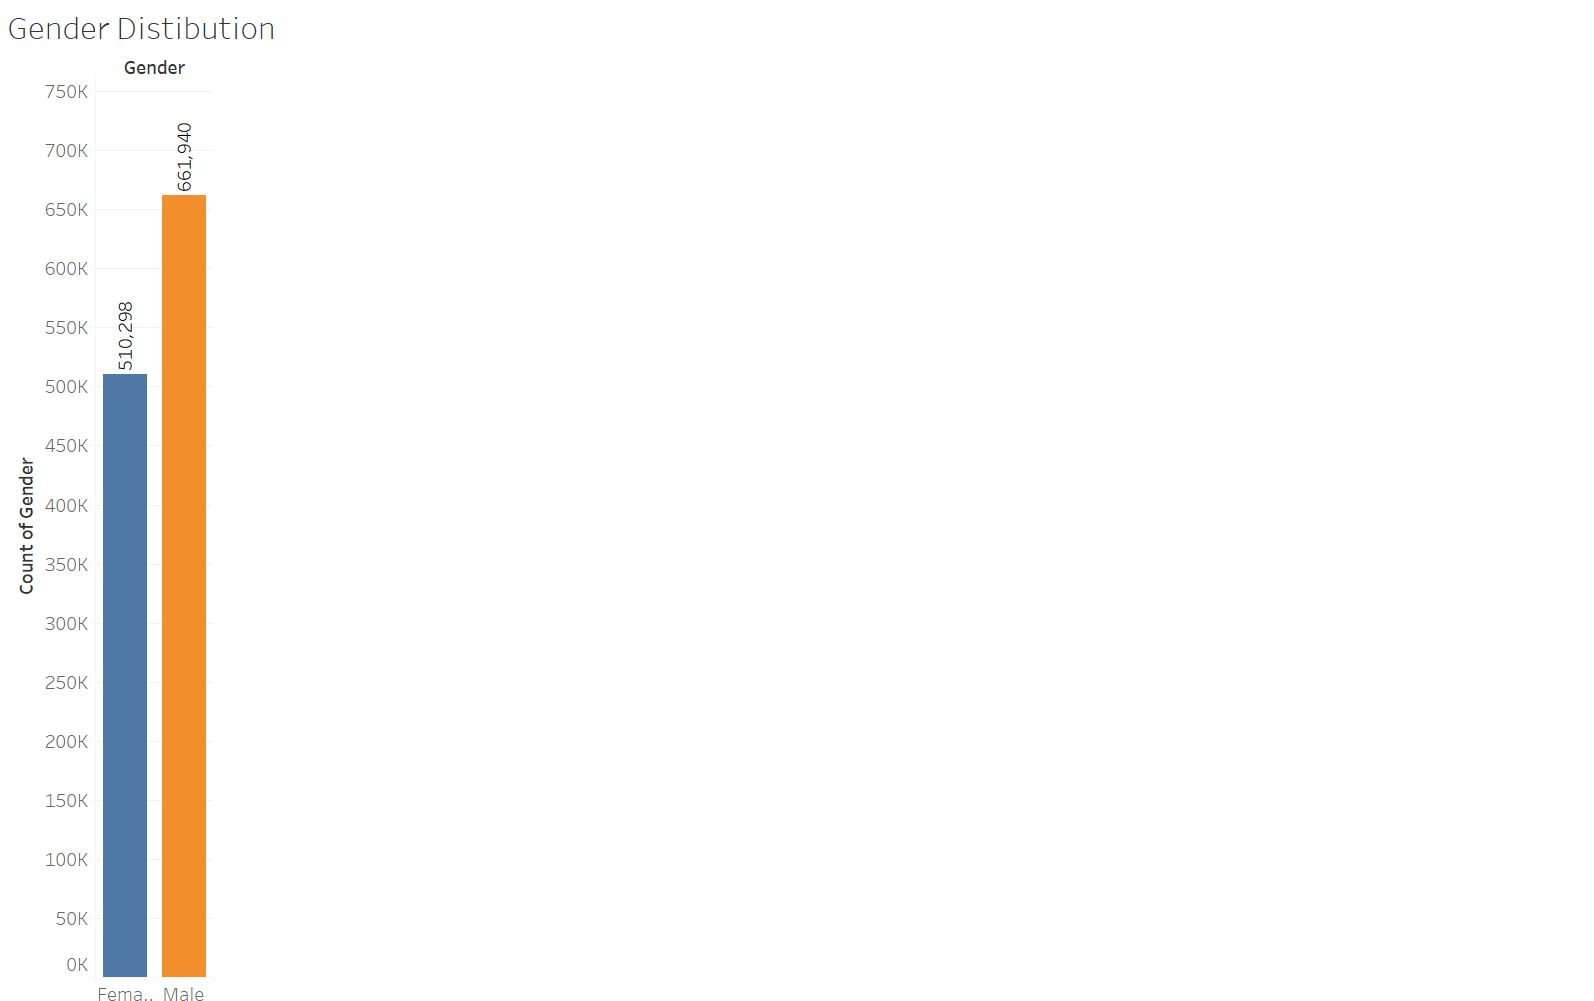

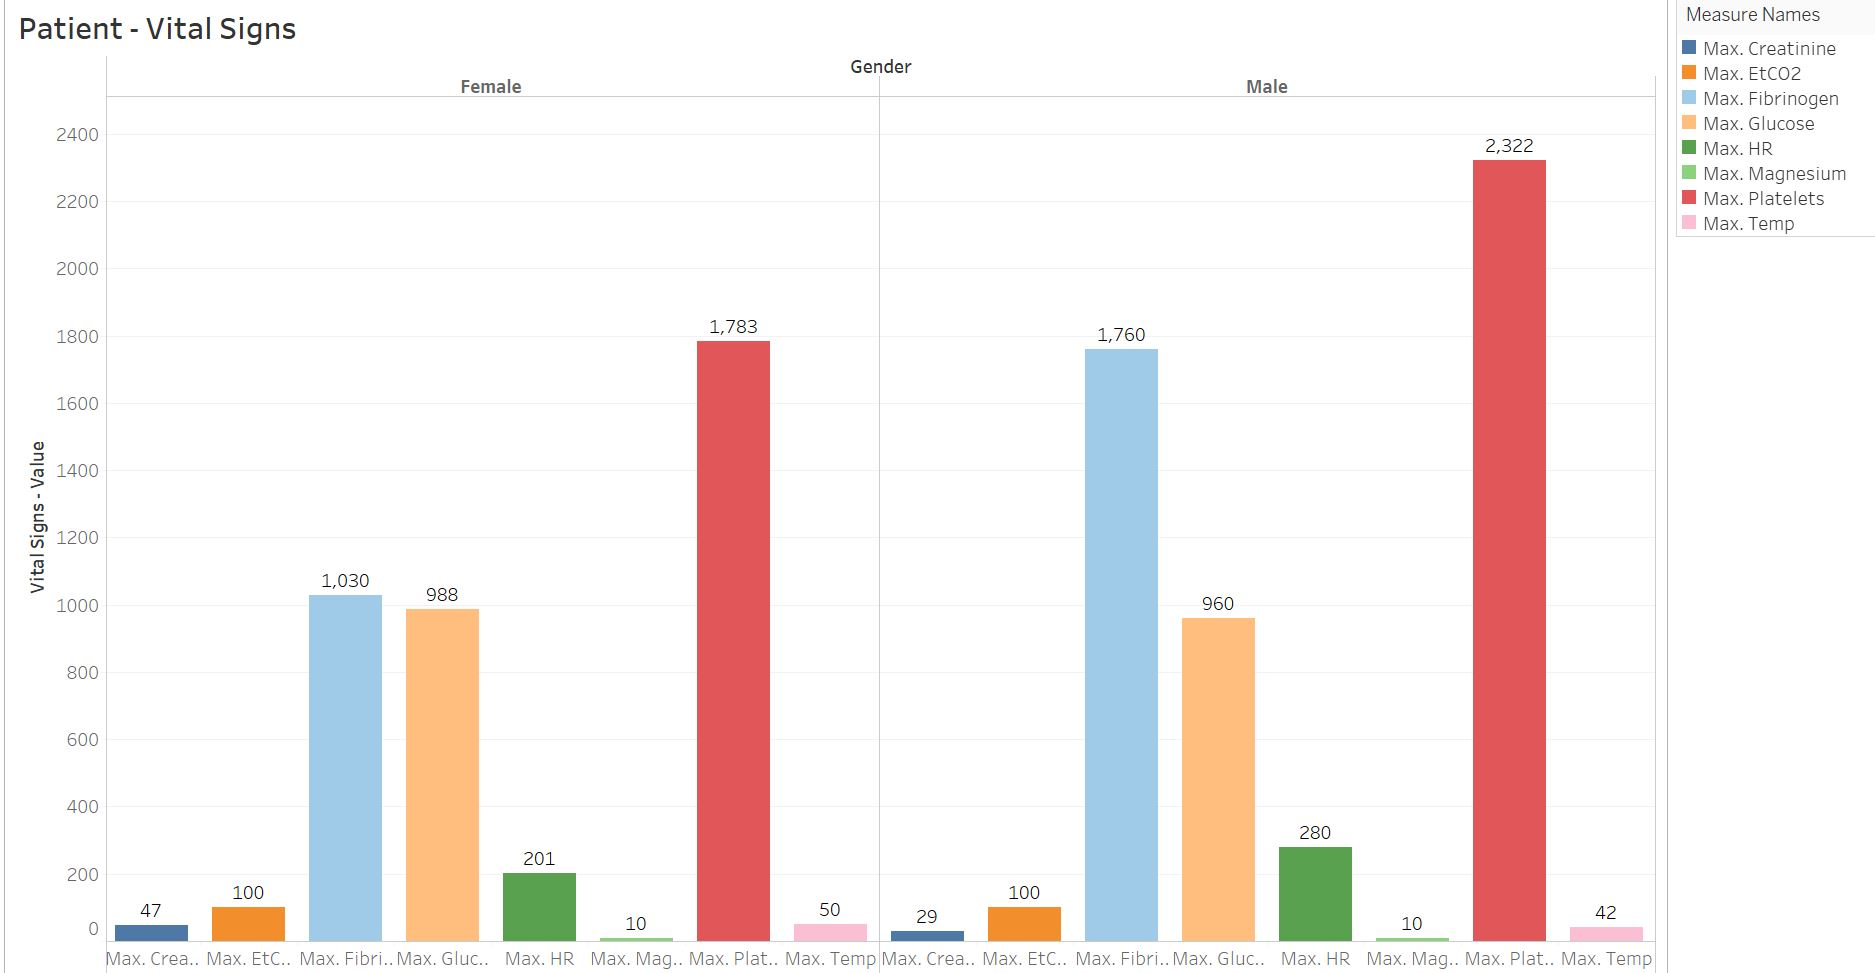

- Normal levels of creatinine in the blood are approximately 0.6 to 1.2 milligrams (mg) per deciliter (dL) in adult males and 0.5 to 1.1 milligrams per deciliter in adult females.

- It is generally medically accepted that normal body temperature ranges between 36.5°C (97.7°F) to 37.5°C (99.5°F)

- Fibrogen range: 3.125-800 ng/m.

- ETCO2 is usually about 5 mmHg below PaCO2.

- In adult humans, there are about 18 g of glucose.

- A normal platelet count ranges from 150,000 to 450,000 platelets per microliter of blood.

- An adult body contains approximately 25 g magnesium.

- Normal heart rate 60 to 100 beats per minute.


In [24]:
pip install dabl

# Implementing a baseline model.

In [19]:
# Creating a baseline model.

import dabl
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

features = ['Resp', 'Glucose','Creatinine','Temp','HR','O2Sat','Age', 'EtCO2', 'Fibrinogen', 'O2Sat']
y = df['SepsisLabel']
X =  df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
sc = dabl.SimpleClassifier().fit(X_train, y_train)
print("Accuracy score", sc.score(X_test, y_test))


Running DummyClassifier()
accuracy: 0.981 average_precision: 0.019 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.495
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.981 average_precision: 0.019 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.495

Running GaussianNB()
accuracy: 0.966 average_precision: 0.032 roc_auc: 0.614 recall_macro: 0.516 f1_macro: 0.517
=== new best GaussianNB() (using recall_macro):
accuracy: 0.966 average_precision: 0.032 roc_auc: 0.614 recall_macro: 0.516 f1_macro: 0.517

Running MultinomialNB()
accuracy: 0.981 average_precision: 0.030 roc_auc: 0.597 recall_macro: 0.500 f1_macro: 0.495
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.799 average_precision: 0.023 roc_auc: 0.558 recall_macro: 0.558 f1_macro: 0.471
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=1) (using recall_macro):
accuracy: 0.799 average_precision: 0.023 roc_auc: 0.558 recall_macro: 0.558 f1_macro: 0.471

Running Decision

##### From the above, we can see that the Decision Tree classifier would be the best model that suits our dataset.so let's create a Decision Tree Classifier Model next.

### Decision Tree Classifier Model

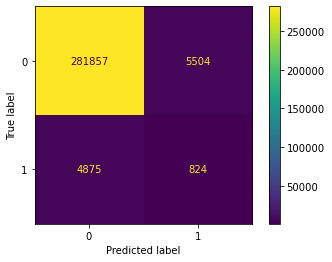

Accuracy: 0.964584044223026
Precision_score: 0.1302149178255373
Recall score: 0.14458676960870329
F1 score: 0.1370250270225326


In [27]:
from sklearn.metrics import plot_confusion_matrix

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)



# Predicting the Test set results
y_pred = classifier.predict(X_test)


# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Evaluate the results
cm

#Confusion Matrix with total number of values
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()



# Find Accuracy, Precision, Recall and F1-score
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision_score:" ,metrics.precision_score(y_test, y_pred))
print("Recall score:" ,metrics.recall_score(y_test, y_pred))
print("F1 score:" ,metrics.f1_score(y_test, y_pred))

#### Evaluting the Model.

In [53]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.964744420937692


###### Here we can see that the model's accuracy is 96.4%, lets se if we can further tune it a bit.

### Tuning the model.

In [54]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.9805534702791238


#### Here, we have tried tuning the parameter of the model with the clause : ****criterion="entropy", max_depth=3****  through which we can further optimise our model to a accuray of 98%

- ****Entropy****: It gives the measure of impurity or randomness in the data. It is given by:

     Entropy= — P(class 1) x Log(P(class 1)) — P(class 2) x Log(P(class 2))
     -where P denotes the probability.
     
     
     
 - ****Max_depth**** - This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data.

### Prediction

Let's try to pass some feature variable and try to predict if a patient has a chance of develeoping Sepsis.

In [115]:
y_pred = classifier.predict(([[18.000000,136.121045,1.469606,37.300000,88.000000,100.000000,63.00,33.046486]]))

y_pred = y_pred.astype(int).tolist()
    

print("Prediction Complete : The outcome of the prediction is:" ,(y_pred))

if y_pred>[0]:
    print("Prediction Complete : This patient might possibly be a Sepsis patient") 
else:
    print("This patient is not a Sepsis patient.") 

Prediction Complete : The outcome of the prediction is: [0]
This patient is not a Sepsis patient.


From the above, we have passed the feature variables and we can see the model predicting outcome as 0, meaning not a Sepsis patient.

In [120]:
y_pred = classifier.predict(([[24.000000,136.121045,1.469606,36.995514,78.0,93.0,78.22,33.046486]]))

y_pred = y_pred.astype(int).tolist()

print("Prediction Complete : The outcome of the prediction is:" ,(y_pred))


if y_pred>[0]:
    print("This patient might possibly be a Sepsis patient.") 
else:
    print("This patient is not a Sepsis patient.") 

Prediction Complete : The outcome of the prediction is: [1]
This patient might possibly be a Sepsis patient.


From the above, we have passed the feature variables and we can see the model predicting outcome as 1, meaning a Sepsis patient.

**References**:
    
    1) https://physionet.org/content/challenge-2019/1.0.0/    
    2) https://archive.physionet.org/challenge/2019/